In [6]:
import pandas as pd

#make sure your csv file is in the same directory as the python file you're working on
with open("ramen-ratings.csv", "rt", encoding="UTF-8") as csv_file:
    print(csv_file.read(1000))

Review #,Brand,Variety,Style,Country,Stars,Top Ten
2580,New Touch,T's Restaurant Tantanmen ,Cup,Japan,3.75,
2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles,Pack,Taiwan,1,
2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,
2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,
2576,Ching's Secret,Singapore Curry,Pack,India,3.75,
2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,
2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,
2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,
2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,
2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,
2570,Tao Kae Noi,Creamy tom Yum Kung Flavour,Pack,Thailand,5,
2569,Yamachan,Yokohama Tonkotsu Shoyu,Pack,USA,5,
2568,Nongshim,Mr. Bibim Stir-Fried Kimchi Flavor,Pack,South Korea,4.25,
2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.5,
2566,Nissin,Demae Ramen Bar Noodle Aka Tonkotsu Flavour Instant Noodle,Pack,Hong Ko

In [7]:
#convert the csv data into a nice readable format using pandas (much harder in other languages)
ramen_df = pd.read_csv("ramen-ratings.csv")
ramen_df

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [8]:
'''Get the top rated ramen dish in the entire dataset (one important thing is that Stars is not an float actually...)
   the reason for that is because some dishes are "unrated", which cannot be expressed numerically. So be sure to parse the 
   strings to floats and if the stars is "unrated" for a row, you can assume it is 0 stars. If there is a tiebreak, just
   choose one dish that is in the tiebreak.
   
'''

max_stars = 0
pandas_index = 0
for i in range(0, len(ramen_df)):
    stars = ramen_df.iloc[i]['Stars']
    if stars == "Unrated":
        stars = 0
    else:
        stars = pd.to_numeric(stars)  # float(stars) also works
        
    #check if a replacement is necessary
    if stars > max_stars:
        max_stars = stars
        pandas_index = i
        
print("The max stars was", max_stars)
print("Here is some information about that review: ")
print("---------------------------------------------")
print(ramen_df.iloc[pandas_index])


The max stars was 5
Here is some information about that review: 
---------------------------------------------
Review #                           2570
Brand                       Tao Kae Noi
Variety     Creamy tom Yum Kung Flavour
Style                              Pack
Country                        Thailand
Stars                                 5
Top Ten                             NaN
Name: 10, dtype: object


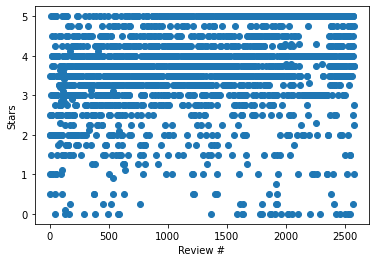

'\n    Unfortunately, this scatter plot is pretty useless because the review number has no impact on the stars. But if for \n    example you were analyzing COVID data, it could be very useful (see below). And yes, you can even do a line of\n    best fit which is getting into machine learning.\n'

In [24]:
'''
    Preview of upcoming attractions:

'''
import numpy as np
import matplotlib.pyplot as plt

x = list()
y = list()
for i in range(0, len(ramen_df)):
    x.append(ramen_df['Review #'][i])
    if ramen_df['Stars'][i] == 'Unrated':
        y.append(0)
    else:
        y.append(float(ramen_df['Stars'][i]))
    
x = pd.Series(x).values
y = pd.Series(y).values
x = x[:, np.newaxis]
plt.scatter(x, y)
plt.xlabel('Review #')
plt.ylabel('Stars')
plt.show()

'''
    Unfortunately, this scatter plot is pretty useless because the review number has no impact on the stars. But if for 
    example you were analyzing COVID data, it could be very useful (see below). And yes, you can even do a line of
    best fit which is getting into machine learning.
'''